# Package Installation

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

## Accounts Table

In [18]:
accounts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Accounts.csv')
accounts

,ID,IsActive,Code,ParentID,GroupCode,AccountTypeID,AccountCategoryID,IsUserCreated,OpeningBalance,ShortDisplayName,IsFlaggedForClose,CurrencyID,BatchID,ProductID,UseBeginDateForPerformance,OpenedDate,CreatedDate,CreatedBy
0,910,1,0000,NaN,NaN,3.0,1,0,1.996279e+07,NaN,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,911,1,1106,NaN,NaN,4.0,1,0,2.058869e+06,NaN,0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
2,912,1,1107,NaN,NaN,4.0,1,0,1.349999e+06,NaN,0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
3,913,1,1108,NaN,NaN,4.0,1,0,3.299625e+06,NaN,0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
4,914,1,1109,NaN,NaN,4.0,1,0,1.042241e+08,NaN,0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1505,1,globalesgmodel,NaN,NaN,3.0,1,0,9.986203e+05,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,1506,1,AMBeacon_DSCV,NaN,NaN,NaN,3,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,1507,1,AMBeacon_SCV,NaN,NaN,NaN,3,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,1508,1,7032,NaN,NaN,4.0,1,0,3.996526e+08,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
accounts[accounts.ID == 912].AccountCategoryID

2    1
Name: AccountCategoryID, dtype: int64

In [20]:
AccountCategoryID = accounts.AccountCategoryID.value_counts().to_frame().reset_index()
AccountCategoryID

,index,AccountCategoryID
0,1,472
1,5,58
2,2,45
3,3,25


In [21]:
AccountCategoryID.rename(columns={'index':'ID'}, inplace = True)
AccountCategoryID

,ID,AccountCategoryID
0,1,472
1,5,58
2,2,45
3,3,25


##  Account Categories Table Info

In [22]:
accountcat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AccountCategories.csv')
accountcat

,ID,Name,Code
0,1,Individual Account,STD
1,2,Consolidated,CMB
2,3,Group,SRE
3,4,Group - User Generated,URE
4,5,Composite,CMP


In [23]:
accountcat_name = pd.merge(AccountCategoryID, accountcat, on='ID', how = 'inner' )
accountcat_name 

,ID,AccountCategoryID,Name,Code
0,1,472,Individual Account,STD
1,5,58,Composite,CMP
2,2,45,Consolidated,CMB
3,3,25,Group,SRE


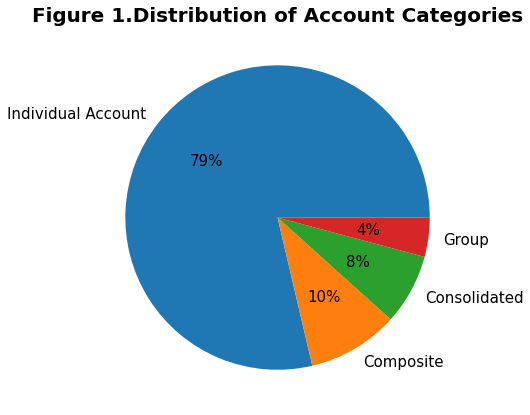

In [24]:
plt.figure(figsize=(7,7))

# declaring exploding pie
explode = [0, 0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette()
# plotting data on chart
plt.pie(accountcat_name['AccountCategoryID'], labels=accountcat_name['Name'], colors=palette_color,
        explode=explode, autopct='%.0f%%',textprops={'fontsize': 15})
plt.title('Figure 1.Distribution of Account Categories', fontsize = 20, fontweight="bold")
plt.savefig('acccat')

## Account Return Index and Index Return Table Info

In [25]:
#benchhist = pd.read_csv('/Users/moonqj/Desktop/Boston University/Capstone/Data/BenchmarkHistory.csv')
indexh = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/912.csv')
indexh.head(3)

,BeginDate,EndDate,AccountReturn,IndexReturn
0,2006-05-11 00:00:00.000,2006-05-31 00:00:00.000,-2.021544,-2.676051
1,2006-05-31 00:00:00.000,2006-06-30 00:00:00.000,0.376105,0.639681
2,2006-06-30 00:00:00.000,2006-07-31 00:00:00.000,1.104883,2.430353


In [26]:
indexh['BeginDate'] = pd.to_datetime(indexh['BeginDate'], format = '%Y-%m')

In [27]:
indexh['EndDate'] = pd.to_datetime(indexh['EndDate'], format = '%Y-%m')

In [28]:
indexh.isnull().sum()

BeginDate        0
EndDate          0
AccountReturn    0
IndexReturn      0
dtype: int64

In [29]:
indexh = indexh[indexh.columns[~indexh.isnull().any()]]

In [30]:
indexh.shape

(182, 4)

- 182 rows of data

In [31]:
indexh.nunique()

BeginDate        182
EndDate          182
AccountReturn    182
IndexReturn      182
dtype: int64

In [32]:
indexh.columns

Index(['BeginDate', 'EndDate', 'AccountReturn', 'IndexReturn'], dtype='object')

- Drop Duplicate rows

In [33]:
indexh.drop_duplicates(inplace = True)
indexh.shape

(182, 4)

In [34]:
indexh.head()

,BeginDate,EndDate,AccountReturn,IndexReturn
0,2006-05-11,2006-05-31,-2.021544,-2.676051
1,2006-05-31,2006-06-30,0.376105,0.639681
2,2006-06-30,2006-07-31,1.104883,2.430353
3,2006-07-31,2006-08-31,2.210218,1.673764
4,2006-08-31,2006-09-30,2.874960,1.993390


In [35]:
indexh['year'] = indexh['EndDate'].dt.year
indexh['month'] =indexh['EndDate'].dt.month
indexh.head()

,BeginDate,EndDate,AccountReturn,IndexReturn,year,month
0,2006-05-11,2006-05-31,-2.021544,-2.676051,2006,5
1,2006-05-31,2006-06-30,0.376105,0.639681,2006,6
2,2006-06-30,2006-07-31,1.104883,2.430353,2006,7
3,2006-07-31,2006-08-31,2.210218,1.673764,2006,8
4,2006-08-31,2006-09-30,2.874960,1.993390,2006,9


In [36]:
# indexh['EndDate'] = indexh['EndDate'].values.astype('datetime64[M]')
indexh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   BeginDate      182 non-null    datetime64[ns]
 1   EndDate        182 non-null    datetime64[ns]
 2   AccountReturn  182 non-null    float64       
 3   IndexReturn    182 non-null    float64       
 4   year           182 non-null    int64         
 5   month          182 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 10.0 KB


- Calculate the difference between AccountReturn and IndexReturn 

In [37]:
indexh['returndiff'] = indexh['AccountReturn'] - indexh['IndexReturn']

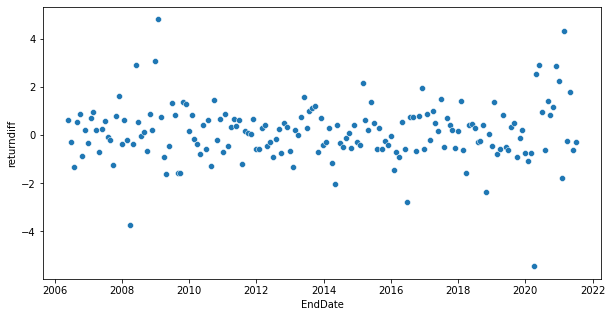

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(indexh['EndDate'],indexh['returndiff'])

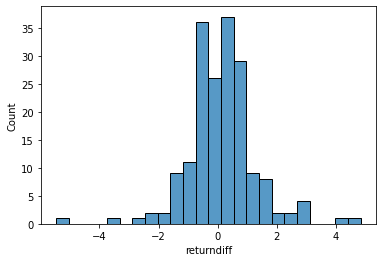

In [39]:
sns.histplot(indexh['returndiff'])

In [40]:
indexh.head(5)

,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff
0,2006-05-11,2006-05-31,-2.021544,-2.676051,2006,5,0.654506
1,2006-05-31,2006-06-30,0.376105,0.639681,2006,6,-0.263576
2,2006-06-30,2006-07-31,1.104883,2.430353,2006,7,-1.325470
3,2006-07-31,2006-08-31,2.210218,1.673764,2006,8,0.536454
4,2006-08-31,2006-09-30,2.874960,1.993390,2006,9,0.881569


## Merge AccountBenchmarks and Benchmarks

In [41]:
ABen = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AccountBenchmarks.csv')
ABen = ABen[ABen['Rank'] == 1]
ABen

,AccountID,AssetClassID,BenchmarkID,Rank
0,911,NaN,82,1
2,912,NaN,82,1
4,913,NaN,82,1
6,914,NaN,82,1
8,915,NaN,82,1
...,...,...,...,...
941,1499,NaN,82,1
945,1503,NaN,60,1
947,1504,NaN,60,1
949,1508,NaN,130,1


In [42]:
ABen.nunique()

AccountID       482
AssetClassID      0
BenchmarkID      91
Rank              1
dtype: int64

In [43]:
ABen.isnull().sum()

AccountID         0
AssetClassID    482
BenchmarkID       0
Rank              0
dtype: int64

In [44]:
Ben = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Benchmarks.csv')
# Ben = ABen[ABen['Rank'] == 1]
Ben = Ben[['ID', 'Name']]
Ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      318 non-null    int64 
 1   Name    318 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.1+ KB


In [45]:
ABen_com = pd.merge(ABen, Ben, left_on = 'BenchmarkID', right_on = 'ID', how = 'inner')
ABen_com.drop(columns = ['AssetClassID'], inplace = True)

In [46]:
ABen_com

,AccountID,BenchmarkID,Rank,ID,Name
0,911,82,1,82,Russell 1000 Value
1,912,82,1,82,Russell 1000 Value
2,913,82,1,82,Russell 1000 Value
3,914,82,1,82,Russell 1000 Value
4,915,82,1,82,Russell 1000 Value
...,...,...,...,...,...
477,1468,331,1,331,Bloomberg Barclays Interm Credit - Prior 5/20 ...
478,1469,323,1,323,Barclays Int Credit / prior to 1Dec09 MLG/C 1-5
479,1470,86,1,86,ICE BofAML US High Yield
480,1471,325,1,325,75% Blmbg Barclays 1-3 GC + 12.5% HY + 12.5% B...


In [47]:
ben_5 = ABen_com.Name.value_counts()[:5].to_frame()
ben_5.reset_index(inplace = True)

In [48]:
ben_5

,index,Name
0,Russell 1000 Value,175
1,Bloomberg Aggregate,58
2,Russell 2000 Value,28
3,S&P 500,21
4,Bloomberg Interm Credit,15


In [49]:
ben_5.columns

Index(['index', 'Name'], dtype='object')

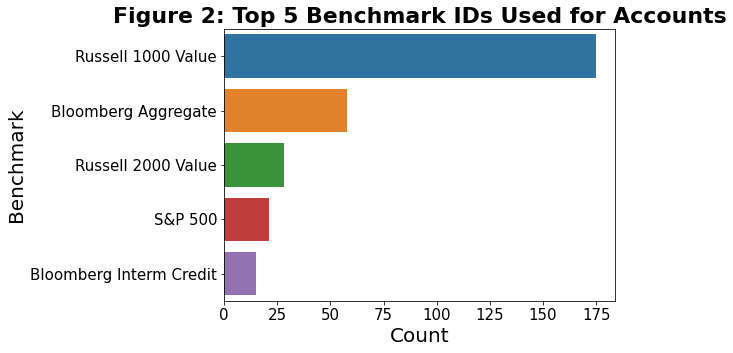

In [50]:
plt.figure(figsize=(7,5))
sns.barplot(y = ben_5['index'], x= ben_5.Name, orient = 'h')
plt.xlabel('Count', fontsize = 20)
plt.ylabel('Benchmark', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(rotation = 0, fontsize = 15)
plt.title('Figure 2: Top 5 Benchmark IDs Used for Accounts', fontsize = 22, fontweight="bold")
plt.savefig('Top5ben')

In [51]:
ABen_com.AccountID

0       911
1       912
2       913
3       914
4       915
       ... 
477    1468
478    1469
479    1470
480    1471
481    1472
Name: AccountID, Length: 482, dtype: int64

In [52]:
# to convert lists to dictionary
res = {ABen_com.AccountID[i]: ABen_com.Name[i] for i in range(len(ABen_com.AccountID))}
res

{911: 'Russell 1000 Value',
 912: 'Russell 1000 Value',
 913: 'Russell 1000 Value',
 914: 'Russell 1000 Value',
 915: 'Russell 1000 Value',
 916: 'Russell 1000 Value',
 917: 'Russell 1000 Value',
 918: 'Russell 1000 Value',
 919: 'Russell 1000 Value',
 920: 'Russell 1000 Value',
 921: 'S&P 500',
 922: 'S&P 500',
 923: 'Russell 1000 Value',
 924: 'Russell 1000 Value',
 925: 'Russell 1000 Value',
 926: 'Russell 3000',
 927: 'Russell 3000',
 928: 'Russell 3000',
 929: 'Russell 1000 Value',
 930: 'Russell 1000 Value',
 931: 'Russell 1000 Value',
 932: 'Russell 1000 Value',
 934: 'Russell Mid Cap Value',
 935: 'Russell Mid Cap Value',
 936: 'Russell Mid Cap Value',
 937: 'Russell Mid Cap Value',
 938: 'Russell 1000 Value',
 939: 'Russell 1000 Value',
 940: 'Russell 2000 Value',
 941: 'Russell 2500',
 942: 'Russell 2000',
 943: 'Russell 2000',
 944: 'Russell 2000 Value',
 945: 'Russell 2000 Value',
 946: 'Russell 2000 Value',
 947: 'Russell 2000 Value',
 948: 'Russell 2000 Value',
 949: 'Rus

# Model Building

## 1.Simple Moving Average (Hyperparameter tuning) - All Years

### Simple Moving Average Function

In [53]:
# Draw the trend plot for a specific AccountID across all time
def all_trending_plot(accountid, plot = False):
    benchdf = indexh.copy()
    date_min = str(benchdf.EndDate.min())[:10]
    date_max = str(benchdf.EndDate.max())[:10]
    if plot == True:
        print('Account ID is {}'.format(accountid))
        print('Start date is {} \nEnd date is {} \nLength period is {} years'.format(benchdf.EndDate.min(),benchdf.EndDate.max(),benchdf.year.max() - benchdf.year.min()))
        plt.figure(figsize=(18,3))
        sns.lineplot(x = benchdf.EndDate, y = benchdf.returndiff)
        plt.title('The Return Difference Between Account "{}" and Benchmark "{}" from '.format(accountid, res[accountid])+ date_min +' to '+ date_max)
        plt.show()
    return benchdf





# Return All data without Anomaly detection
# All data with Anomaly detection within specific timeframe per AccountID(e.g. 3 year, benchmark 30)
from sklearn.metrics import mean_squared_error
def rolling_mean(benchdf, accountid, plot = False):
# Compare within the same range -- data starting from index 13
# Find the best N (N = total number of periods in the average)
    try:
      mse_dict = {}
      for index in range(1,13):
          mse = mean_squared_error(benchdf.returndiff[13:], 
                                      benchdf["returndiff"].rolling(index).mean()[12:len(benchdf)-1])
          mse_dict[index] = mse
      opt_index = list(mse_dict.keys())[list(mse_dict.values()).index(min(mse_dict.values()))]
    except:
      opt_index = len(benchdf)
    print(mse_dict[opt_index])
    print(opt_index)

# Caculate the simple moving average using the optimal N
    benchdf['SMA'] = benchdf.returndiff.rolling(window = opt_index).mean()
# Filling missing values using backward fill 
    benchdf['SMA'].bfill(axis = 'rows', inplace = True)
# Calculate the differences between the actual and the simple moving average.
# Find the upper bound by 99 percentile diff between return and SMA + SMA (SMA value higher than 99% SMA)
# Find the lower bound by 1 percentile diff between return and SMA + SMA (SMA value lower than 1% SMA))
    benchdf['upper'] = np.quantile((benchdf.returndiff - benchdf['SMA']), 0.99) + benchdf['SMA']
    benchdf['lower'] = np.quantile((benchdf.returndiff - benchdf['SMA']), 0.01) + benchdf['SMA']
    
    benchdf['anomaly detection'] =  0
    #(SMA value higher than 99% SMA) or (SMA value lower than 1% SMA)
    conditions = (benchdf.returndiff > benchdf.upper) | (benchdf.returndiff < benchdf.lower)
    benchdf.loc[conditions, 'anomaly detection'] = 1

    if plot == True:
        benchdf[['returndiff', 'SMA']].plot(figsize=(18,3))

    anomaly_df = benchdf[benchdf['anomaly detection'] == 1]
    anomaly_1_0_df = benchdf

    return (anomaly_df, anomaly_1_0_df)






# Draw a anomaly plot for a specific account (use the return from rolling_mean function)
def anomaly_plot(benchdf, benchdf_anomaly, accountid):
    date_min = str(benchdf.EndDate.min())[:10]
    date_max = str(benchdf.EndDate.max())[:10]
    print('Account ID is {}'.format(accountid))
    print('Start date is {} \nEnd date is {} \nLength period is {} years'.format(date_min,date_max,round(len(benchdf.month)/12)))
    plt.figure(figsize=(28,7))
    sns.lineplot(x = benchdf.EndDate, y = benchdf.returndiff)
    plt.plot(benchdf_anomaly.EndDate, benchdf_anomaly.returndiff, linestyle='none', marker='X', color='red', markersize=15)
    plt.fill_between(
       benchdf.EndDate, benchdf['lower'], benchdf['upper'], alpha=0.5, color="g",
       label="Predicted interval")
    plt.title('Figure 4.\nThe Return Difference Between "Account {}" & "Benchmark {}" from '.format(accountid, res[accountid])+ date_min +' to '+ date_max + "(MA)", fontsize = 25, fontweight="bold")  
    plt.xticks(rotation = 45)
    plt.xlabel('Date', fontsize=25)
    plt.ylabel('Diff in Return',fontsize=25)
    plt.savefig("ma.png")

### New Try (All years)

In [54]:
all_trending_plot(912)

,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff
0,2006-05-11,2006-05-31,-2.021544,-2.676051,2006,5,0.654506
1,2006-05-31,2006-06-30,0.376105,0.639681,2006,6,-0.263576
2,2006-06-30,2006-07-31,1.104883,2.430353,2006,7,-1.325470
3,2006-07-31,2006-08-31,2.210218,1.673764,2006,8,0.536454
4,2006-08-31,2006-09-30,2.874960,1.993390,2006,9,0.881569
...,...,...,...,...,...,...,...
177,2021-01-31,2021-02-28,10.372135,6.043287,2021,2,4.328848
178,2021-02-28,2021-03-31,5.665492,5.884409,2021,3,-0.218917
179,2021-03-31,2021-04-30,5.800151,3.999134,2021,4,1.801018
180,2021-04-30,2021-05-31,1.741528,2.334437,2021,5,-0.592909


In [55]:
rolling_mean(all_trending_plot(912), 912, plot = False)[0]

1.6068629147403246
7


,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff,SMA,upper,lower,anomaly detection
22,2008-02-29,2008-03-31,-4.480513,-0.751903,2008,3,-3.728610,-0.352910,2.930671,-3.161557,1
32,2008-12-31,2009-01-31,-6.672553,-11.498945,2009,1,4.826392,1.208957,4.492538,-1.599690,1
166,2020-02-29,2020-03-31,-22.549806,-17.089449,2020,3,-5.460357,-1.258420,2.025161,-4.067067,1
167,2020-03-31,2020-04-30,13.806828,11.242180,2020,4,2.564648,-0.764645,2.518937,-3.573291,1


In [56]:
from timeit import default_timer as timer

start = timer()

all_time_benchmark_912_anomaly_all_year_ma = rolling_mean(all_trending_plot(912), 912, plot = False)[0]
all_time_benchmark_912_all_year_ma = rolling_mean(all_trending_plot(912), 912, plot = False)[1]

end = timer()
print(end - start)

1.6068629147403246
7
1.6068629147403246
7
0.03297105800004374


Account ID is 912
Start date is 2006-05-31 
End date is 2021-06-30 
Length period is 15 years


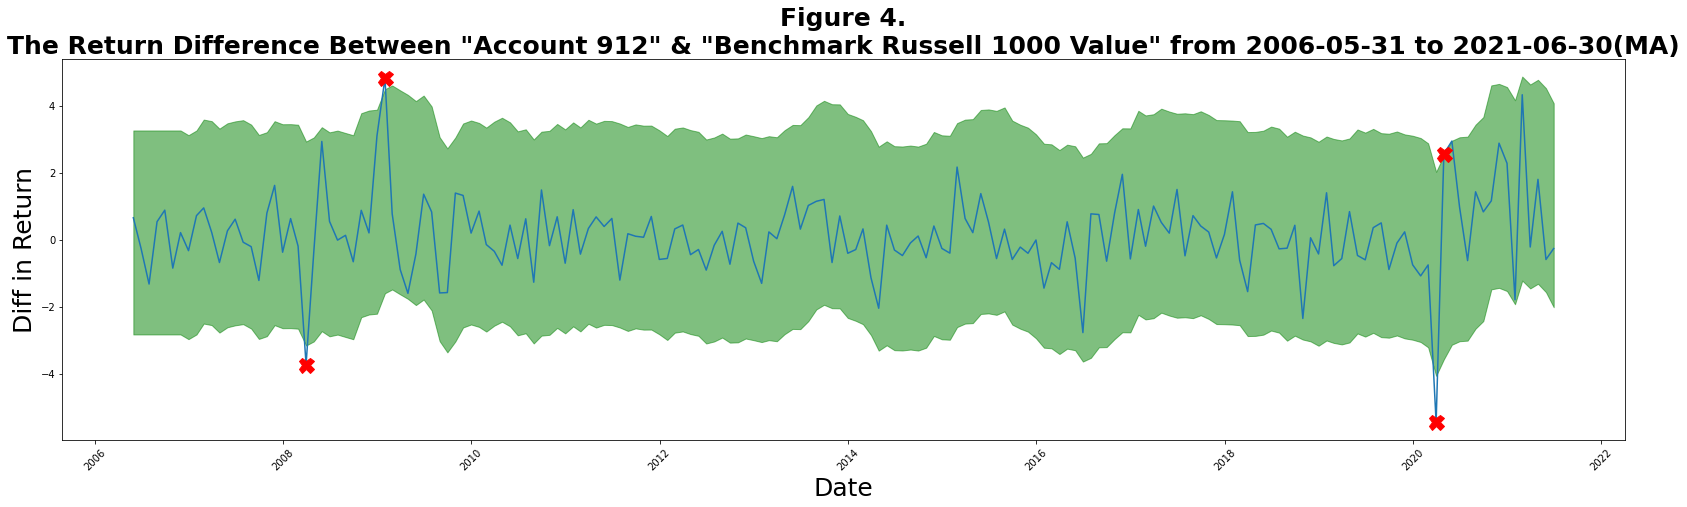

In [57]:
anomaly_plot(all_time_benchmark_912_all_year_ma, all_time_benchmark_912_anomaly_all_year_ma, 912)

##  2.Exponential Smoothing (Hyperparameter tuning)

- Exponential Smoothing is designed to address this problem It Exponential Smoothing assigns exponentially decreasing weights as the observation get older

- recent data are given relatively more weight in forecasting than the older data.

### Exponential Function

In [58]:
# Draw the trend plot for a specific benchmark across all time
def all_trending_plot(accountid, plot = False):
    benchdf =  indexh.copy()
    date_min = str(benchdf.EndDate.min())[:10]
    date_max = str(benchdf.EndDate.max())[:10]
    if plot == True:
        print('Account ID is {}'.format(accountid))
        print('Start date is {} \nEnd date is {} \nLength period is {} years'.format(benchdf.EndDate.min(),benchdf.EndDate.max(),benchdf.year.max() - benchdf.year.min()))
        plt.figure(figsize=(18,3))
        sns.lineplot(x = benchdf.EndDate, y = benchdf.returndiff)
        plt.title('The Return Difference Between Account "{}" and Benchmark "{}" from '.format(accountid, res[accountid])+ date_min +' to '+ date_max)
        plt.show()
    return benchdf


# Return All data without Anomaly detection and All data with Anomaly detection within specific timeframe per benchmark(e.g. 3 year, benchmark 30)
# Defined used inside anonmaly_table_benchmark()
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing
def exp_smoothing(benchdf, accountid,  plot = False):
    mse_dict = {}
    for alpha in np.arange(0.0, 1.1, 0.01):
      mse = mean_squared_error(benchdf['returndiff'][13:],ExponentialSmoothing(benchdf['returndiff']).
      fit(smoothing_level = alpha).predict(13,len(benchdf)-1))
      mse_dict[alpha] = mse

      opt_alpha = list(mse_dict.keys())[list(mse_dict.values()).index(min(mse_dict.values()))]

    print(mse_dict[opt_alpha])
    print(opt_alpha)
    print(mse_dict)

    benchdf['ES'] = ExponentialSmoothing(benchdf['returndiff']).fit(smoothing_level = opt_alpha).predict(0,len(benchdf)-1)
    benchdf['upper'] = np.quantile((benchdf.returndiff - benchdf['ES']), 0.99) + benchdf['ES']
    benchdf['lower'] = np.quantile((benchdf.returndiff - benchdf['ES']), 0.01) + benchdf['ES']
  

    benchdf['anomaly detection'] =  0
    conditions = (benchdf.returndiff > benchdf.upper) | (benchdf.returndiff < benchdf.lower)
    benchdf.loc[conditions, 'anomaly detection'] = 1

    if plot == True:
        benchdf[['returndiff', 'SMA']].plot(figsize=(18,3))

    anomaly_df = benchdf[benchdf['anomaly detection'] == 1]
    anomaly_1_0_df = benchdf

    return (anomaly_df, anomaly_1_0_df)


# # Return All time data with anomaly and without anomaly for a specific benchmark (use the return from five_year function)
# def anonmaly_table_benchmark(benchdf, accountid, plot = False):       
       
#        all_time_benchmark_anomaly = pd.DataFrame(columns = ['BeginDate', 'EndDate', 'AccountReturn', 'IndexReturn', 'year', 'month',
#        'returndiff', 'SMA', 'diff', 'upper', 'lower',
#               'anomaly detection'])
       
#        all_time_benchmark = pd.DataFrame(columns = ['BeginDate', 'EndDate', 'AccountReturn', 'IndexReturn', 'year', 'month',
#        'returndiff' 'SMA', 'diff', 'upper', 'lower',
#               'anomaly detection'])

#        for i in benchdf.keys():
#               cc =  exp_smoothing(benchdf[i], accountid, plot = False)[0]
#               dd =  exp_smoothing(benchdf[i], accountid, plot = False)[1]
#               all_time_benchmark_anomaly = pd.concat([all_time_benchmark_anomaly,cc], axis =0)
#               all_time_benchmark = pd.concat([all_time_benchmark,dd], axis =0)

#        return all_time_benchmark_anomaly, all_time_benchmark 


# Draw a anomaly plot for a specific benchmark (use the return from anonmaly_table_benchmark function)
def anomaly_plot(benchdf, benchdf_anomaly, accountid):
    date_min = str(benchdf.EndDate.min())[:10]
    date_max = str(benchdf.EndDate.max())[:10]
    print('Account ID is {}'.format(accountid))
    print('Start date is {} \nEnd date is {} \nLength period is {} years'.format(date_min,date_max,round(len(benchdf.month)/12)))
    plt.figure(figsize=(28,7))
    sns.lineplot(x = benchdf.EndDate, y = benchdf.returndiff)
    plt.plot(benchdf_anomaly.EndDate, benchdf_anomaly.returndiff, linestyle='none', marker='X', color='red', markersize=15)
    plt.fill_between(
       benchdf.EndDate, benchdf['lower'], benchdf['upper'], alpha=0.5, color="g",
       label="Predicted interval")
    plt.title('Figure 5.\nThe Return Difference Between Account "{}" and Benchmark "{}" from '.format(accountid, res[accountid])+ date_min +' to '+ date_max + '(ES)', fontsize = 25, fontweight="bold")  
    plt.xticks(rotation = 45)
    plt.xlabel('Date', fontsize=25)
    plt.ylabel('Diff in Return',fontsize=25)
    plt.savefig("es.png")

### New Try (All Years)



In [59]:
all_trending_plot(912)

,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff
0,2006-05-11,2006-05-31,-2.021544,-2.676051,2006,5,0.654506
1,2006-05-31,2006-06-30,0.376105,0.639681,2006,6,-0.263576
2,2006-06-30,2006-07-31,1.104883,2.430353,2006,7,-1.325470
3,2006-07-31,2006-08-31,2.210218,1.673764,2006,8,0.536454
4,2006-08-31,2006-09-30,2.874960,1.993390,2006,9,0.881569
...,...,...,...,...,...,...,...
177,2021-01-31,2021-02-28,10.372135,6.043287,2021,2,4.328848
178,2021-02-28,2021-03-31,5.665492,5.884409,2021,3,-0.218917
179,2021-03-31,2021-04-30,5.800151,3.999134,2021,4,1.801018
180,2021-04-30,2021-05-31,1.741528,2.334437,2021,5,-0.592909


In [60]:
ExponentialSmoothing(indexh['returndiff']).fit(smoothing_level = 0).predict(0,len(indexh)-1)

0      0.124953
1      0.124953
2      0.124953
3      0.124953
4      0.124953
         ...   
177    0.124953
178    0.124953
179    0.124953
180    0.124953
181    0.124953
Length: 182, dtype: float64

In [61]:
from timeit import default_timer as timer

start = timer()

all_time_benchmark_912_anomaly_all_year_es, all_time_benchmark_912_all_year_es = exp_smoothing(all_trending_plot(912), 912)

end = timer()
print(end - start)

1.465849087979833
0.0
{0.0: 1.465849087979833, 0.01: 1.4788155125921838, 0.02: 1.4889978837373785, 0.03: 1.4976202227432687, 0.04: 1.5054620767257425, 0.05: 1.5128469881497788, 0.06: 1.519919902753526, 0.07: 1.5267778636500235, 0.08: 1.5335010989009676, 0.09: 1.5401559358677452, 0.1: 1.546794454943585, 0.11: 1.5534557136980776, 0.12: 1.5601681098904987, 0.13: 1.56695203840314, 0.14: 1.5738222356348135, 0.15: 1.5807896373139392, 0.16: 1.587862713787501, 0.17: 1.5950483658747125, 0.18: 1.602352488661228, 0.19: 1.609780294535873, 0.2: 1.6173364814312252, 0.21: 1.6250253042116674, 0.22: 1.632850593008343, 0.23: 1.6408157469169669, 0.24: 1.6489237208879968, 0.25: 1.6571770158463899, 0.26: 1.6655776772440476, 0.27: 1.6741273035748292, 0.28: 1.6828270648494892, 0.29: 1.6916777295004466, 0.3: 1.7006796981637864, 0.31: 1.7098330422335333, 0.32: 1.7191375456282656, 0.33: 1.7285927479367023, 0.34: 1.7381979879283782, 0.35000000000000003: 1.74795244616148, 0.36: 1.757855185962158, 0.37: 1.76790519

In [62]:
all_time_benchmark_912_anomaly_all_year_es, all_time_benchmark_912_all_year_es = exp_smoothing(all_trending_plot(912), 912)

1.465849087979833
0.0
{0.0: 1.465849087979833, 0.01: 1.4788155125921838, 0.02: 1.4889978837373785, 0.03: 1.4976202227432687, 0.04: 1.5054620767257425, 0.05: 1.5128469881497788, 0.06: 1.519919902753526, 0.07: 1.5267778636500235, 0.08: 1.5335010989009676, 0.09: 1.5401559358677452, 0.1: 1.546794454943585, 0.11: 1.5534557136980776, 0.12: 1.5601681098904987, 0.13: 1.56695203840314, 0.14: 1.5738222356348135, 0.15: 1.5807896373139392, 0.16: 1.587862713787501, 0.17: 1.5950483658747125, 0.18: 1.602352488661228, 0.19: 1.609780294535873, 0.2: 1.6173364814312252, 0.21: 1.6250253042116674, 0.22: 1.632850593008343, 0.23: 1.6408157469169669, 0.24: 1.6489237208879968, 0.25: 1.6571770158463899, 0.26: 1.6655776772440476, 0.27: 1.6741273035748292, 0.28: 1.6828270648494892, 0.29: 1.6916777295004466, 0.3: 1.7006796981637864, 0.31: 1.7098330422335333, 0.32: 1.7191375456282656, 0.33: 1.7285927479367023, 0.34: 1.7381979879283782, 0.35000000000000003: 1.74795244616148, 0.36: 1.757855185962158, 0.37: 1.76790519

In [63]:
all_time_benchmark_912_anomaly_all_year_es

,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff,ES,upper,lower,anomaly detection
22,2008-02-29,2008-03-31,-4.480513,-0.751903,2008,3,-3.728610,0.124953,3.335055,-2.956619,1
32,2008-12-31,2009-01-31,-6.672553,-11.498945,2009,1,4.826392,0.124953,3.335055,-2.956619,1
166,2020-02-29,2020-03-31,-22.549806,-17.089449,2020,3,-5.460357,0.124953,3.335055,-2.956619,1
177,2021-01-31,2021-02-28,10.372135,6.043287,2021,2,4.328848,0.124953,3.335055,-2.956619,1


In [64]:
all_time_benchmark_912_all_year_es

,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff,ES,upper,lower,anomaly detection
0,2006-05-11,2006-05-31,-2.021544,-2.676051,2006,5,0.654506,0.124953,3.335055,-2.956619,0
1,2006-05-31,2006-06-30,0.376105,0.639681,2006,6,-0.263576,0.124953,3.335055,-2.956619,0
2,2006-06-30,2006-07-31,1.104883,2.430353,2006,7,-1.325470,0.124953,3.335055,-2.956619,0
3,2006-07-31,2006-08-31,2.210218,1.673764,2006,8,0.536454,0.124953,3.335055,-2.956619,0
4,2006-08-31,2006-09-30,2.874960,1.993390,2006,9,0.881569,0.124953,3.335055,-2.956619,0
...,...,...,...,...,...,...,...,...,...,...,...
177,2021-01-31,2021-02-28,10.372135,6.043287,2021,2,4.328848,0.124953,3.335055,-2.956619,1
178,2021-02-28,2021-03-31,5.665492,5.884409,2021,3,-0.218917,0.124953,3.335055,-2.956619,0
179,2021-03-31,2021-04-30,5.800151,3.999134,2021,4,1.801018,0.124953,3.335055,-2.956619,0
180,2021-04-30,2021-05-31,1.741528,2.334437,2021,5,-0.592909,0.124953,3.335055,-2.956619,0


Account ID is 912
Start date is 2006-05-31 
End date is 2021-06-30 
Length period is 15 years


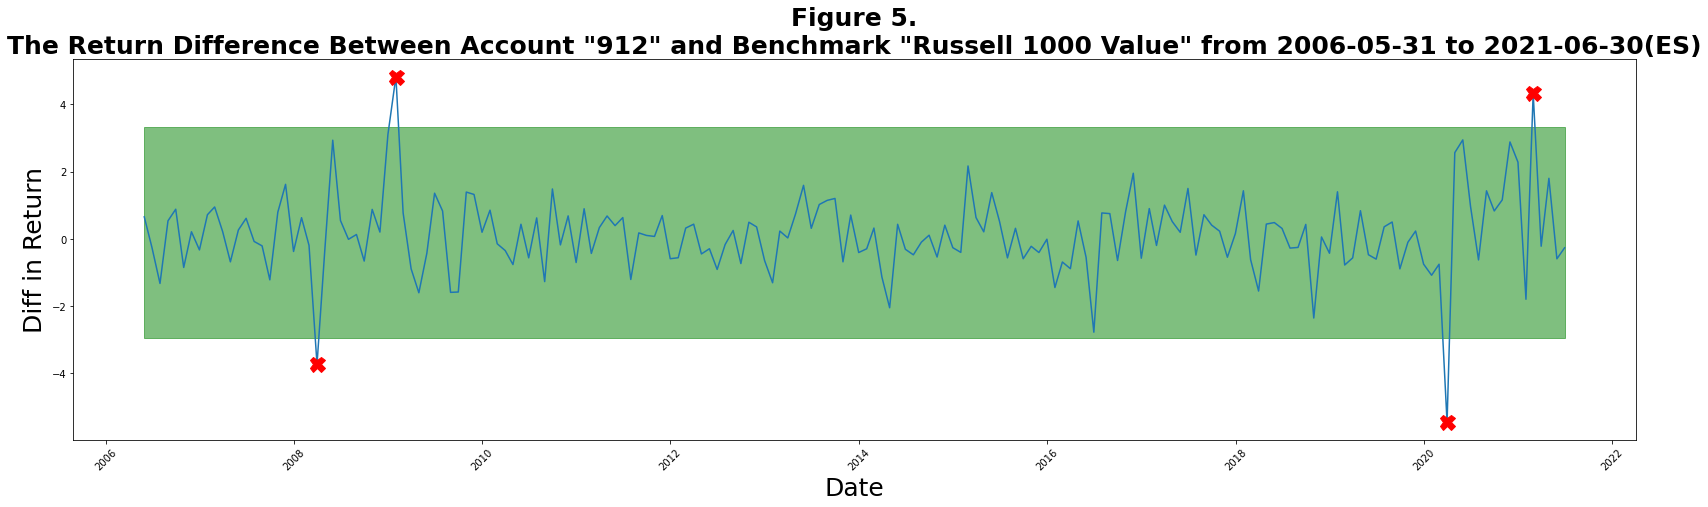

In [65]:
anomaly_plot(all_time_benchmark_912_all_year_es, all_time_benchmark_912_anomaly_all_year_es, 912)

## 3.The Prophet Module

> The prophet module is open-sourced by Facebook.com and available in both R and Python in their Github. If a time series can be formulated by time such as year, season, month or week, the prophet module is a good choice. 



In [66]:
# !pip install fbprophet
# Or use "conda install -c conda-forge/label/cf202003 fbprophet"
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

### Prophet Function

In [67]:
def prediction_Prophet(benchdf):
  dfNew = pd.DataFrame()
  dfNew['ds'] = benchdf['EndDate']
  dfNew['y'] = benchdf[['returndiff']]
# Set Confidence interval level at 99%
  m = Prophet(daily_seasonality=True, interval_width = 0.99)
  m.fit(dfNew)
  horizon= 0
  future = m.make_future_dataframe(periods=horizon)
  forecast = m.predict(future)
 
  benchdf.reset_index(inplace = True)
  benchdf = benchdf.drop(columns = 'index')

  benchdf.loc[:,['ds', 'yhat', 'yhat_lower', 'yhat_upper']] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
  benchdf['anomaly detection'] =  0
  conditions = (benchdf.returndiff > benchdf.yhat_upper) | (benchdf.returndiff < benchdf.yhat_lower)
  benchdf.loc[conditions, 'anomaly detection'] = 1

  anomaly_df = benchdf[benchdf['anomaly detection'] == 1]
  anomaly_1_0_df = benchdf

  return (anomaly_df, anomaly_1_0_df)

def anomaly_plot(benchdf, benchdf_anomaly, accountid):
    benchdf.reset_index(inplace = True)
    benchdf_anomaly.reset_index(inplace = True)
    
    date_min = str(benchdf.EndDate.min())[:10]
    date_max = str(benchdf.EndDate.max())[:10]
    print('Account ID is {}'.format(accountid))
    print('Start date is {} \nEnd date is {} \nLength period is {} years'.format(date_min,date_max,round(len(benchdf.month)/12)))
    plt.figure(figsize=(28,7))
    sns.lineplot(x = benchdf.EndDate, y = benchdf.returndiff)
    plt.plot(benchdf_anomaly.EndDate, benchdf_anomaly.returndiff, linestyle='none', marker='X', color='red', markersize=7)
    plt.fill_between(
       benchdf.EndDate, benchdf['yhat_lower'], benchdf['yhat_upper'], alpha=0.5, color="g",
       label="Predicted interval")
    plt.title('The Return Difference Between Account "{}" and Benchmark "{}" from '.format(accountid, res[accountid])+ date_min +' to '+ date_max + "(Prophet)", fontsize = 25)  
    plt.xticks(rotation = 45)
    plt.xlabel('Date', fontsize=25)
    plt.ylabel('Diff in Return',fontsize=25)
    plt.savefig("prop.png")


### New Try(All Years)

In [68]:
indexh

,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff
0,2006-05-11,2006-05-31,-2.021544,-2.676051,2006,5,0.654506
1,2006-05-31,2006-06-30,0.376105,0.639681,2006,6,-0.263576
2,2006-06-30,2006-07-31,1.104883,2.430353,2006,7,-1.325470
3,2006-07-31,2006-08-31,2.210218,1.673764,2006,8,0.536454
4,2006-08-31,2006-09-30,2.874960,1.993390,2006,9,0.881569
...,...,...,...,...,...,...,...
177,2021-01-31,2021-02-28,10.372135,6.043287,2021,2,4.328848
178,2021-02-28,2021-03-31,5.665492,5.884409,2021,3,-0.218917
179,2021-03-31,2021-04-30,5.800151,3.999134,2021,4,1.801018
180,2021-04-30,2021-05-31,1.741528,2.334437,2021,5,-0.592909


In [69]:
from timeit import default_timer as timer

start = timer()

all_time_benchmark_912_anomaly_all_year_prop, all_time_benchmark_912_all_year_prop = prediction_Prophet(indexh)

end = timer()
print(end - start)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


2.6894835770000327


In [70]:
all_time_benchmark_912_all_year_prop

,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff,ds,yhat,yhat_lower,yhat_upper,anomaly detection
0,2006-05-11,2006-05-31,-2.021544,-2.676051,2006,5,0.654506,2006-05-31,0.568131,-2.717796,3.602693,0
1,2006-05-31,2006-06-30,0.376105,0.639681,2006,6,-0.263576,2006-06-30,0.054688,-2.627966,2.813045,0
2,2006-06-30,2006-07-31,1.104883,2.430353,2006,7,-1.325470,2006-07-31,-0.116490,-2.896797,2.777697,0
3,2006-07-31,2006-08-31,2.210218,1.673764,2006,8,0.536454,2006-08-31,0.156814,-2.476540,2.954093,0
4,2006-08-31,2006-09-30,2.874960,1.993390,2006,9,0.881569,2006-09-30,-0.060467,-2.666918,2.733411,0
...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-01-31,2021-02-28,10.372135,6.043287,2021,2,4.328848,2021-02-28,0.349299,-2.396232,3.010504,1
178,2021-02-28,2021-03-31,5.665492,5.884409,2021,3,-0.218917,2021-03-31,-0.805049,-3.288433,1.907921,0
179,2021-03-31,2021-04-30,5.800151,3.999134,2021,4,1.801018,2021-04-30,0.174588,-2.894860,3.312022,0
180,2021-04-30,2021-05-31,1.741528,2.334437,2021,5,-0.592909,2021-05-31,0.591171,-2.481760,3.285851,0


In [71]:
all_time_benchmark_912_anomaly_all_year_prop

,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff,ds,yhat,yhat_lower,yhat_upper,anomaly detection
22,2008-02-29,2008-03-31,-4.480513,-0.751903,2008,3,-3.728610,2008-03-31,-0.837109,-3.436555,2.243601,1
31,2008-11-30,2008-12-31,4.489941,1.387998,2008,12,3.101943,2008-12-31,0.057716,-2.660883,2.786040,1
32,2008-12-31,2009-01-31,-6.672553,-11.498945,2009,1,4.826392,2009-01-31,0.320905,-2.649037,3.586855,1
166,2020-02-29,2020-03-31,-22.549806,-17.089449,2020,3,-5.460357,2020-03-31,-0.827185,-3.715674,2.006027,1
177,2021-01-31,2021-02-28,10.372135,6.043287,2021,2,4.328848,2021-02-28,0.349299,-2.396232,3.010504,1


In [72]:
len(all_time_benchmark_912_anomaly_all_year_prop)

5

Account ID is 912
Start date is 2006-05-31 
End date is 2021-06-30 
Length period is 15 years


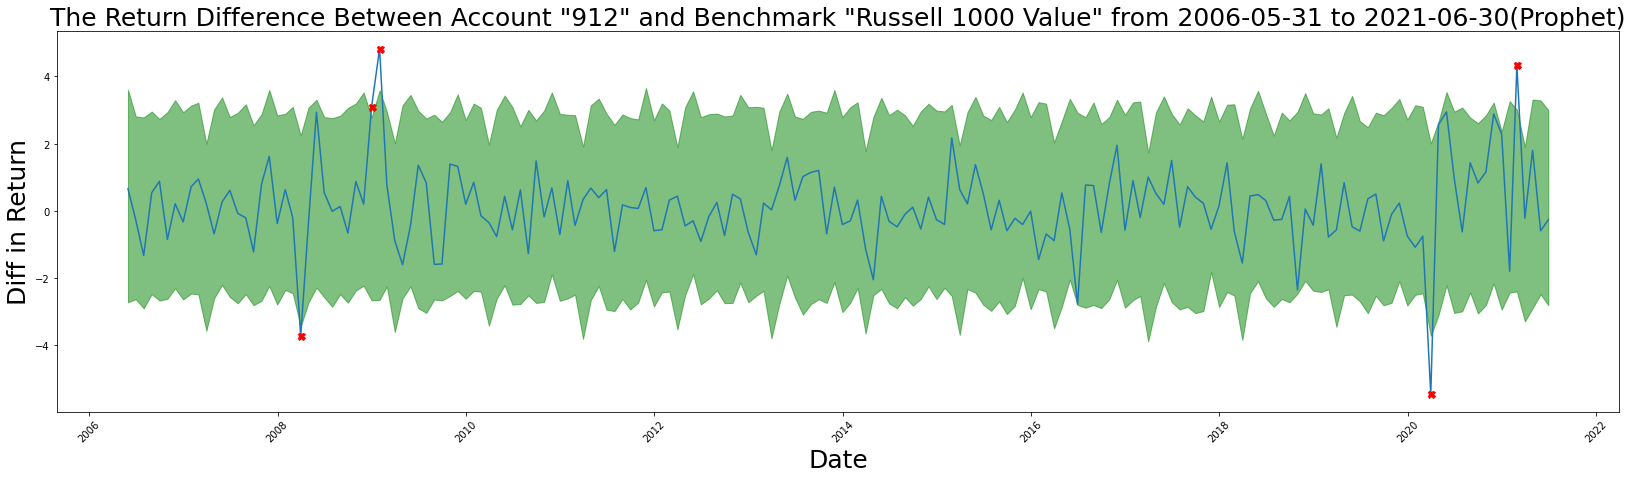

In [73]:
anomaly_plot(all_time_benchmark_912_all_year_prop,all_time_benchmark_912_anomaly_all_year_prop,  912)

## 4.K-means

In [74]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [75]:
indexh_k = indexh.copy()

> The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

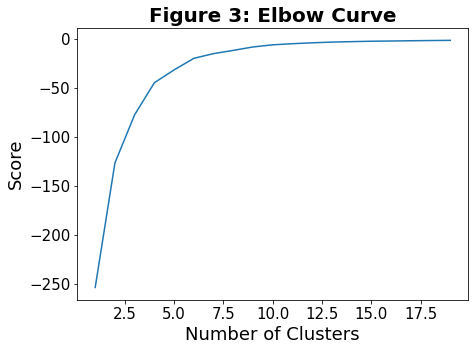

In [76]:
data = indexh[['returndiff']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters',fontsize = 18)
plt.ylabel('Score', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Figure 3: Elbow Curve', fontsize = 20, fontweight="bold")
plt.savefig('Elbow')
plt.show();

- From the above elbow curve, we see that the Elbow Curve levels off after 10 clusters, indicating that the addition of more clusters do not explain much more of the variance in our relevant variable

### Clustering Approach

> The underline assumption in the clustering approach is that if we cluster the data, normal data will belong to clusters while anomalies will not belong to any clusters or belong to small clusters.

- Calculate the distance between each point and its nearest centroid. The biggest distances are considered as anomaly.

- We use outliers_fraction to provide information to the algorithm about the proportion of the outliers present in our data set. Situations may vary from data set to data set. However, as a starting figure, I estimate outliers_fraction=0.01, since it is the percentage of observations that should fall over the absolute value 3 in the Z score distance from the mean in a standardized normal distribution.

- In Machine Learning, StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1. 

- Calculate number_of_outliers using outliers_fraction.

- Set threshold as the minimum distance of these outliers.

- The anomaly result of anomaly1 contains the above method Cluster (0:normal, 1:anomaly).

In [77]:
from timeit import default_timer as timer
start = timer()

X = data.values
X_std = StandardScaler().fit_transform(X)

In [78]:
data = data[['returndiff']]
data = pd.DataFrame(X_std, columns=['returndiff'])
data

,returndiff
0,0.448364
1,-0.328962
2,-1.228051
3,0.348412
4,0.640615
...,...
177,3.559373
178,-0.291150
179,1.419098
180,-0.607803


In [79]:
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i, n_init = 10, max_iter = 100,random_state=123).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

In [80]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.DataFrame()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.loc[i,'Distance'] = np.linalg.norm(Xa-Xb)
    return distance


outliers_fraction = 0.02
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
# KMeans(n_clusters=10)


def anomaly_plot(benchdf, benchdf_anomaly, accountid):
    benchdf.reset_index(inplace = True)
    benchdf_anomaly.reset_index(inplace = True)
    
    date_min = str(benchdf.EndDate.min())[:10]
    date_max = str(benchdf.EndDate.max())[:10]
    print('Account ID is {}'.format(accountid))
    print('Start date is {} \nEnd date is {} \nLength period is {} years'.format(date_min,date_max,round(len(benchdf.month)/12)))
    plt.figure(figsize=(28,7))
    sns.lineplot(x = benchdf.EndDate, y = benchdf.returndiff)
    plt.plot(benchdf_anomaly.EndDate, benchdf_anomaly.returndiff, linestyle='none', marker='X', color='red', markersize=15)
    # plt.fill_between(
    #    benchdf.EndDate, benchdf['yhat_lower'], benchdf['yhat_upper'], alpha=0.5, color="g",
    #    label="Predicted interval")
    plt.title('Figure 6.\nThe Return Difference Between Account "{}" and Benchmark "{}" from '.format(accountid, res[accountid])+ date_min +' to '+ date_max + "(Kmeans)", fontsize = 25, fontweight="bold")  
    plt.xticks(rotation = 45)
    plt.xlabel('Date', fontsize=25)
    plt.ylabel('Diff in Return',fontsize=25)
    plt.savefig("kmeans.png")

In [81]:
distance = getDistanceByPoint(data, kmeans[9])

number_of_outliers = round(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers, 'Distance').min()

# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
indexh_k['anomaly1'] = (distance >= threshold).astype(int)

all_time_benchmark_912_anomaly_all_year_kmeans = indexh_k[indexh_k['anomaly1']==1]

all_time_benchmark_912_all_year_kmeans = indexh_k



end = timer()
print(end - start)

0.8926784889999908


In [82]:
all_time_benchmark_912_anomaly_all_year_kmeans

,index,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff,anomaly1
18,18,2007-10-31,2007-11-30,-3.266257,-4.887405,2007,11,1.621148,1
84,84,2013-04-30,2013-05-31,4.158248,2.566572,2013,5,1.591676,1
126,126,2016-10-31,2016-11-30,7.662960,5.711403,2016,11,1.951558,1
179,179,2021-03-31,2021-04-30,5.800151,3.999134,2021,4,1.801018,1


In [83]:
all_time_benchmark_912_all_year_kmeans

,index,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff,anomaly1
0,0,2006-05-11,2006-05-31,-2.021544,-2.676051,2006,5,0.654506,0
1,1,2006-05-31,2006-06-30,0.376105,0.639681,2006,6,-0.263576,0
2,2,2006-06-30,2006-07-31,1.104883,2.430353,2006,7,-1.325470,0
3,3,2006-07-31,2006-08-31,2.210218,1.673764,2006,8,0.536454,0
4,4,2006-08-31,2006-09-30,2.874960,1.993390,2006,9,0.881569,0
...,...,...,...,...,...,...,...,...,...
177,177,2021-01-31,2021-02-28,10.372135,6.043287,2021,2,4.328848,0
178,178,2021-02-28,2021-03-31,5.665492,5.884409,2021,3,-0.218917,0
179,179,2021-03-31,2021-04-30,5.800151,3.999134,2021,4,1.801018,1
180,180,2021-04-30,2021-05-31,1.741528,2.334437,2021,5,-0.592909,0


Account ID is 912
Start date is 2006-05-31 
End date is 2021-06-30 
Length period is 15 years


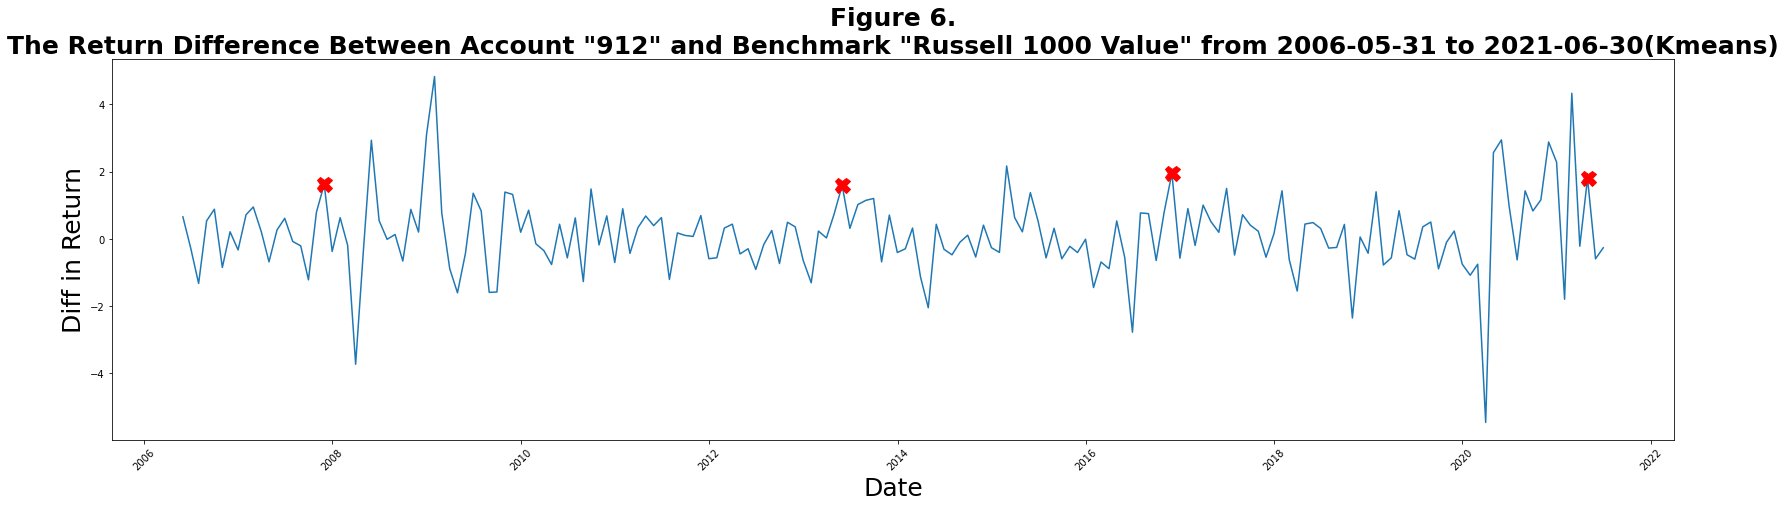

In [84]:
anomaly_plot(all_time_benchmark_912_all_year_kmeans, all_time_benchmark_912_anomaly_all_year_kmeans, 912)

# Model Evaluation

In [85]:
all_time_benchmark_912_anomaly_all_year_ma

,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff,SMA,upper,lower,anomaly detection
22,2008-02-29,2008-03-31,-4.480513,-0.751903,2008,3,-3.728610,-0.352910,2.930671,-3.161557,1
32,2008-12-31,2009-01-31,-6.672553,-11.498945,2009,1,4.826392,1.208957,4.492538,-1.599690,1
166,2020-02-29,2020-03-31,-22.549806,-17.089449,2020,3,-5.460357,-1.258420,2.025161,-4.067067,1
167,2020-03-31,2020-04-30,13.806828,11.242180,2020,4,2.564648,-0.764645,2.518937,-3.573291,1


In [86]:
all_time_benchmark_912_anomaly_all_year_es

,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff,ES,upper,lower,anomaly detection
22,2008-02-29,2008-03-31,-4.480513,-0.751903,2008,3,-3.728610,0.124953,3.335055,-2.956619,1
32,2008-12-31,2009-01-31,-6.672553,-11.498945,2009,1,4.826392,0.124953,3.335055,-2.956619,1
166,2020-02-29,2020-03-31,-22.549806,-17.089449,2020,3,-5.460357,0.124953,3.335055,-2.956619,1
177,2021-01-31,2021-02-28,10.372135,6.043287,2021,2,4.328848,0.124953,3.335055,-2.956619,1


In [87]:
all_time_benchmark_912_anomaly_all_year_prop

,index,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff,ds,yhat,yhat_lower,yhat_upper,anomaly detection
0,22,2008-02-29,2008-03-31,-4.480513,-0.751903,2008,3,-3.728610,2008-03-31,-0.837109,-3.436555,2.243601,1
1,31,2008-11-30,2008-12-31,4.489941,1.387998,2008,12,3.101943,2008-12-31,0.057716,-2.660883,2.786040,1
2,32,2008-12-31,2009-01-31,-6.672553,-11.498945,2009,1,4.826392,2009-01-31,0.320905,-2.649037,3.586855,1
3,166,2020-02-29,2020-03-31,-22.549806,-17.089449,2020,3,-5.460357,2020-03-31,-0.827185,-3.715674,2.006027,1
4,177,2021-01-31,2021-02-28,10.372135,6.043287,2021,2,4.328848,2021-02-28,0.349299,-2.396232,3.010504,1


In [88]:
ma_es = pd.merge(all_time_benchmark_912_anomaly_all_year_ma,all_time_benchmark_912_anomaly_all_year_es, on = 'BeginDate', how = 'inner' )

In [89]:
ma_es

,BeginDate,EndDate_x,AccountReturn_x,IndexReturn_x,year_x,month_x,returndiff_x,SMA,upper_x,lower_x,...,EndDate_y,AccountReturn_y,IndexReturn_y,year_y,month_y,returndiff_y,ES,upper_y,lower_y,anomaly detection_y
0,2008-02-29,2008-03-31,-4.480513,-0.751903,2008,3,-3.728610,-0.352910,2.930671,-3.161557,...,2008-03-31,-4.480513,-0.751903,2008,3,-3.728610,0.124953,3.335055,-2.956619,1
1,2008-12-31,2009-01-31,-6.672553,-11.498945,2009,1,4.826392,1.208957,4.492538,-1.599690,...,2009-01-31,-6.672553,-11.498945,2009,1,4.826392,0.124953,3.335055,-2.956619,1
2,2020-02-29,2020-03-31,-22.549806,-17.089449,2020,3,-5.460357,-1.258420,2.025161,-4.067067,...,2020-03-31,-22.549806,-17.089449,2020,3,-5.460357,0.124953,3.335055,-2.956619,1


In [90]:
ma_es_prop = pd.merge(ma_es,all_time_benchmark_912_anomaly_all_year_prop, left_on = 'EndDate_x',right_on = 'EndDate' ,how = 'inner' )
ma_es_prop

,BeginDate_x,EndDate_x,AccountReturn_x,IndexReturn_x,year_x,month_x,returndiff_x,SMA,upper_x,lower_x,...,AccountReturn,IndexReturn,year,month,returndiff,ds,yhat,yhat_lower,yhat_upper,anomaly detection
0,2008-02-29,2008-03-31,-4.480513,-0.751903,2008,3,-3.728610,-0.352910,2.930671,-3.161557,...,-4.480513,-0.751903,2008,3,-3.728610,2008-03-31,-0.837109,-3.436555,2.243601,1
1,2008-12-31,2009-01-31,-6.672553,-11.498945,2009,1,4.826392,1.208957,4.492538,-1.599690,...,-6.672553,-11.498945,2009,1,4.826392,2009-01-31,0.320905,-2.649037,3.586855,1
2,2020-02-29,2020-03-31,-22.549806,-17.089449,2020,3,-5.460357,-1.258420,2.025161,-4.067067,...,-22.549806,-17.089449,2020,3,-5.460357,2020-03-31,-0.827185,-3.715674,2.006027,1


In [91]:
all_time_benchmark_912_anomaly_all_year_kmeans

,level_0,index,BeginDate,EndDate,AccountReturn,IndexReturn,year,month,returndiff,anomaly1
0,18,18,2007-10-31,2007-11-30,-3.266257,-4.887405,2007,11,1.621148,1
1,84,84,2013-04-30,2013-05-31,4.158248,2.566572,2013,5,1.591676,1
2,126,126,2016-10-31,2016-11-30,7.662960,5.711403,2016,11,1.951558,1
3,179,179,2021-03-31,2021-04-30,5.800151,3.999134,2021,4,1.801018,1


In [92]:
ma_es_prop_kmeans = pd.merge(ma_es_prop,all_time_benchmark_912_anomaly_all_year_kmeans, left_on = 'EndDate_x',right_on = 'EndDate' ,how = 'inner' )
ma_es_prop_kmeans

,BeginDate_x,EndDate_x,AccountReturn_x,IndexReturn_x,year_x,month_x,returndiff_x,SMA,upper_x,lower_x,...,level_0,index_y,BeginDate,EndDate_y,AccountReturn_y,IndexReturn_y,year_y,month_y,returndiff_y,anomaly1


In [93]:
# plt.figure(figsize=(20,10))
# plt.plot(indexh['EndDate'],indexh['returndiff'], label = 'Actual')
# plt.plot(all_time_benchmark_912_all_year_ma['EndDate'],all_time_benchmark_912_all_year_ma['SMA'], label = 'SMA')
# plt.plot(all_time_benchmark_912_all_year_es['EndDate'],all_time_benchmark_912_all_year_es['ES'], label = 'ES')
# # plt.plot(all_time_benchmark_912_all_year_prop['EndDate'],all_time_benchmark_912_all_year_prop['yhat'], label = 'Prop')
# plt.legend()